In [1]:
import socketserver
import io
from fastai import *
from fastai.vision import *
import sys
from IPython.display import display

### Code for client on raspberry pi is:
```python
import socket
import picamera

camera = picamera.PiCamera()

# camera.capture('pict.jpg')

sock = socket.socket()

try:
    sock.connect(('10.1.69.216', 5515))
    conn = sock.makefile('wb')
    # file like object to capture to
    camera.capture(conn, 'jpeg')

    #received = str(sock.recv(1024))
finally: 
    sock.close()

```

IP 10.1.69.200 sent image.
32642 bytes received


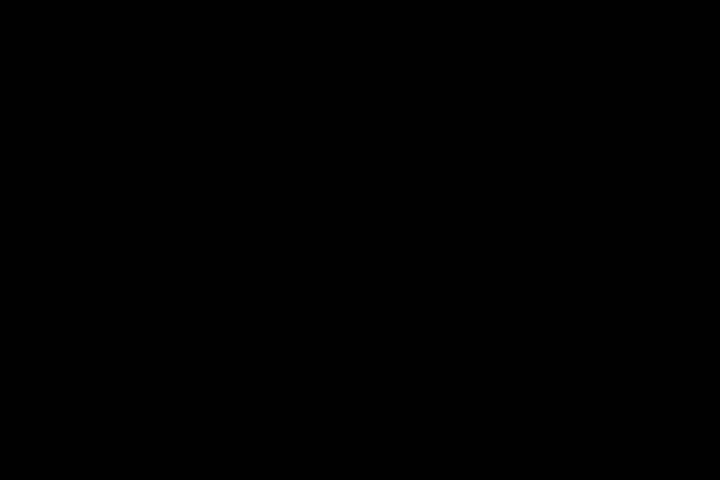

IP 10.1.69.200 sent image.
34271 bytes received


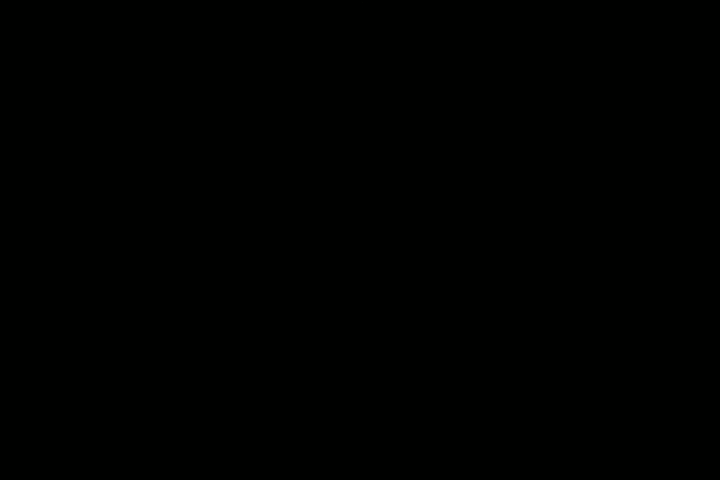

In [ ]:
class ServerTCPSocketHandler(socketserver.BaseRequestHandler):
    """
    The RequestHandler class for server.
    """
    
    buffer_size = 16384
    
    def handle(self):
        # self.request is the TCP socket connected to the client
        
        # use a bytrarray to receive the image data
        self.data = bytearray()
        
        while True:
            # receive the image data in buffer_size chunks
            chunk = self.request.recv(self.buffer_size)
            # and append to bytearray
            self.data += chunk
            if not chunk:
                break
        
        received_img = open_image(io.BytesIO(self.data))

        print("IP {} sent image.".format(self.client_address[0]))
        print("{} bytes received".format(sys.getsizeof(self.data)))
        
        
        # save a copy to file system for debugging etc.
        img_file = open('received-image.jpg', 'wb')
        img_file.write(self.data)  
        img_file.close()
        
        # display image in notebook
        display(received_img)
        
        #self.request.sendall(self.data.upper())
        #self.request.sendall(bytes("thanks buddy", "utf-8"))
    
# if __name__ == "__main__": 

HOST, PORT = socketserver.socket.gethostname(), 5515

# instantiate the server, and bind to localhost on port 9999
server = socketserver.TCPServer((HOST, PORT), ServerTCPSocketHandler)

# activate the server
server.serve_forever()
#server.handle_request()
